In [1]:
import os
TEUFEL_ROOT = os.path.abspath("..")
os.chdir(TEUFEL_ROOT)

import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
import scipy.constants as sc

# sys.path.append(TEUFEL_ROOT+'/scripts')
from scripts.teufel import *
# import scripts.teufel

TEUFEL - THz Emission from Undulators and Free-Electron Lasers


In [2]:
mec2 = sc.m_e * sc.c**2 / sc.e
λ = 1e-4
ω = 2*sc.pi*sc.c/λ
k = ω/sc.c
print(f'k = {0.01*k:.2f}/cm')
λU = 0.1
kU = 2*sc.pi/λU
E_kin = 30.0e6
γ = E_kin / mec2 + 1
print(f'γ = {γ:.3f}')
K = np.sqrt(2.0*(λ/λU * 2*γ**2 -1.0))
print(f'K = {K:.3f}')

k = 628.32/cm
γ = 59.709
K = 3.501


# Run radiation test case with \<wave\> lattice element 

In [3]:
! ./build/teufel tests/fel1d_radiation.xml


 TEUFEL 0.10.01

 THz-Emission From Undulators and Free-Electron Lasers


 TEUFEL parallel computing on 1 nodes.

node 0 : fwl57 PID=488688 total memory 32632.6 MB using 20 parallel threads
node 0 memory usage : 212.808 MB

reading XML input from tests/fel1d_radiation.xml
input parsed without errors
case : Energy modulation of an electron beam by FEL interaction with an electromagnetic wave inside an undulator
by : Ulf Lehnert 25.4.2023

calc : beam kinetic energy [eV] = 3e+07
calc : gamma = 59.7085
calc : resonance wavelength [m] = 0.0001
calc : tracking length [m] = 2.0014
calc : tracking total time [s] = 6.67595e-09
calc : dz = 2e-06
calc : dt = 6.67128e-15
calc : tracking steps = 1.0007e+06
calc : K(U100) = 3.50149
U100::PlanarUndulator
calc : K(U100) = 3.50149
planar undulator  N = 14,  lambda = 0.1,  K(rms) = 2.47593

lattice of 1 elements created.


beam of 1 bunches created.
total number of particles : 1
total charge : 1nC

FEL-1D interaction  N=2000,   dz=2e-06 m
  propagatio

### show trajectories

In [17]:
filename = "fel1d-radiation_probe.hdf5"

# Open the file for reading
print("reading ",filename)
hdf = h5py.File(filename, "r")

# Get the group
group = hdf['Probe']
# print(group.attrs.keys())
N_data = group.attrs['NOD']
N_step = group.attrs['NOTS']
N_part = group.attrs['NOP']
print(N_part, N_step, N_data)

coordinates = np.array(group)
hdf.close()

print(f'have read {coordinates.shape} array.')

reading  fel1d-radiation_probe.hdf5
1 10008 16
have read (10008, 1, 16) array.


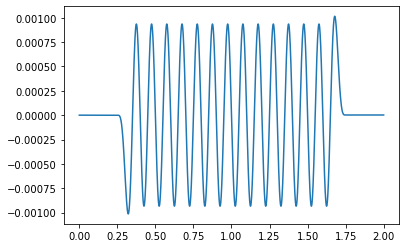

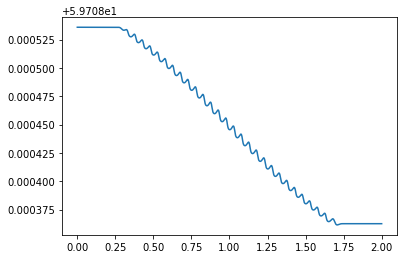

In [18]:
t = coordinates[:,0,0]
x = coordinates[:,0,1]
z = coordinates[:,0,3]
bgx = coordinates[:,0,4]
bgy = coordinates[:,0,5]
bgz = coordinates[:,0,6]
bg2 = np.power(bgx,2) + np.power(bgy,2) + np.power(bgz,2)
gamma = np.sqrt(bg2+1.0)

plt.plot(z,x)
plt.show()

plt.plot(z,gamma)
plt.show()

### show interaction fields

In [19]:
filename = "fel1d-radiation_field.hdf5"

# Open the file for reading
print("reading ",filename)
hdf = h5py.File(filename, "r")
print()

# Get the group
fields = hdf['InteractionField']
# print(fields.attrs.keys())
N_field = fields.attrs['N_field']
N_steps = fields.attrs['N_steps']
N_output = fields.attrs['N_output']
dt = fields.attrs['dt']
prop = np.array([fields.attrs['prop.x'], fields.attrs['prop.y'], fields.attrs['prop.z']])
origin = np.array([fields.attrs['origin.x'], fields.attrs['origin.y'], fields.attrs['origin.z']])
print(f'field size = {N_field},  steps = {N_steps},  output every {N_output} steps,  dt = {dt:.4g} s')
print('propagation step = ',prop)
print('origin position = ',origin)

a = np.array(fields)
hdf.close()

print(f'have read {a.shape} array.')


reading  fel1d-radiation_field.hdf5

field size = 2000,  steps = 10008,  output every 100 steps,  dt = 6.671e-15 s
propagation step =  [-0.e+00 -0.e+00 -2.e-06]
origin position =  [0.    0.    0.001]
have read (10008, 2000) array.


0.0


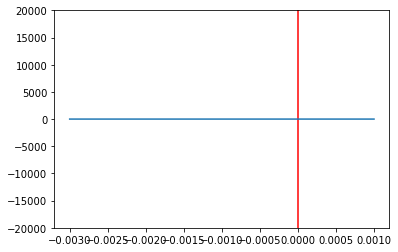

In [20]:
step = 0
E_x = np.array(a[step])
t = dt*np.arange(E_x.shape[0])
prop_length = step*dt*N_output*sc.c
z = origin[2] + prop_length + prop[2]*np.arange(E_x.shape[0])

z_list = coordinates[step,:,3]
z_bunch = np.mean(z_list)
print(z_bunch)

plt.plot(z,E_x)
plt.ylim(-2e4,2e4)
plt.vlines(z_bunch, -2e4,2e4, color='r')
plt.show()

0.39986688193093667


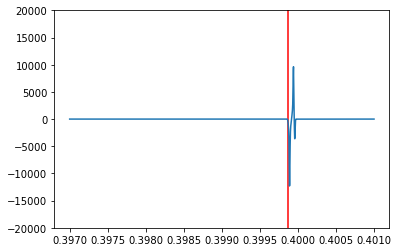

In [21]:
step = 2000
E_x = np.array(a[step])
t = dt*np.arange(E_x.shape[0])
prop_length = step*dt*N_output*sc.c
z = origin[2] + prop_length + prop[2]*np.arange(E_x.shape[0])

z_list = coordinates[step,:,3]
z_bunch = np.mean(z_list)
print(z_bunch)

plt.plot(z,E_x)
plt.ylim(-2e4,2e4)
plt.vlines(z_bunch, -2e4,2e4, color='r')
plt.show()

0.39986688193093667


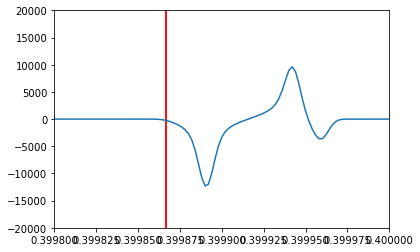

In [22]:
step = 2000
E_x = np.array(a[step])
t = dt*np.arange(E_x.shape[0])
prop_length = step*dt*N_output*sc.c
z = origin[2] + prop_length + prop[2]*np.arange(E_x.shape[0])

z_list = coordinates[step,:,3]
z_bunch = np.mean(z_list)
print(z_bunch)

plt.plot(z,E_x)
plt.xlim(0.3998,0.4000)
plt.vlines(z_bunch, -5e4,5e4, color='r')
plt.ylim(-2e4,2e4)
plt.vlines(z_bunch, -2e4,2e4, color='r')
plt.show()

1.998530997570339


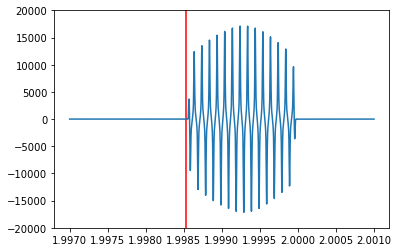

In [23]:
step = 10000
E_x = np.array(a[step])
t = dt*np.arange(E_x.shape[0])
prop_length = step*dt*N_output*sc.c
z = origin[2] + prop_length + prop[2]*np.arange(E_x.shape[0])

z_list = coordinates[step,:,3]
z_bunch = np.mean(z_list)
print(z_bunch)

plt.plot(z,E_x)
plt.ylim(-2e4,2e4)
plt.vlines(z_bunch, -2e4,2e4, color='r')
plt.show()

1.998530997570339


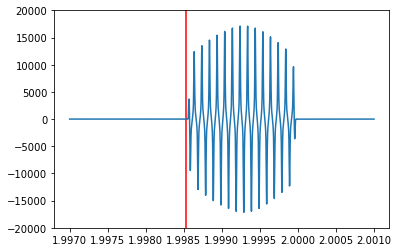

In [23]:
step = 10000
B_y = np.array(a[step])
t = dt*np.arange(E_x.shape[0])
prop_length = step*dt*N_output*sc.c
z = origin[2] + prop_length + prop[2]*np.arange(E_x.shape[0])

z_list = coordinates[step,:,3]
z_bunch = np.mean(z_list)
print(z_bunch)

plt.plot(z,E_x)
plt.ylim(-2e4,2e4)
plt.vlines(z_bunch, -2e4,2e4, color='r')
plt.show()

## show sources - current density

In [24]:
# filename = "fel1d.hdf5"
filename = "fel1d-radiation_field.hdf5"

# Open the file for reading
print("reading ",filename)
hdf = h5py.File(filename, "r")
print()

# Get the group
fields = hdf['InteractionField']
a = np.array(fields)
# print(fields.attrs.keys())
N_field = fields.attrs['N_field']
N_steps = fields.attrs['N_steps']
N_output = fields.attrs['N_output']
dt = fields.attrs['dt']
prop = np.array([fields.attrs['prop.x'], fields.attrs['prop.y'], fields.attrs['prop.z']])
origin = np.array([fields.attrs['origin.x'], fields.attrs['origin.y'], fields.attrs['origin.z']])
print(f'field size = {N_field},  steps = {N_steps},  output every {N_output} steps,  dt = {dt:.4g} s')
print('propagation step = ',prop)
print('origin position = ',origin)

J_data = hdf['CurrentDensity']
J = np.array(J_data)
hdf.close()

print(f'have read {J.shape} array.')
print(f'peak value {np.max(J):.4g} V/m s²')

reading  fel1d-radiation_field.hdf5

field size = 2000,  steps = 10008,  output every 100 steps,  dt = 6.671e-15 s
propagation step =  [-0.e+00 -0.e+00 -2.e-06]
origin position =  [0.    0.    0.001]
have read (10008, 2000) array.
peak value 7.433e+28 V/m s²


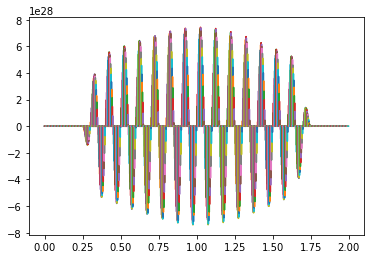

In [26]:
for step in np.arange(0,10000,10):
    J_x = np.array(J[step])
    t = dt*np.arange(J_x.shape[0])
    prop_length = step*dt*N_output*sc.c
    z = origin[2] + prop_length + prop[2]*np.arange(J_x.shape[0])
    plt.plot(z,J_x)
plt.show()

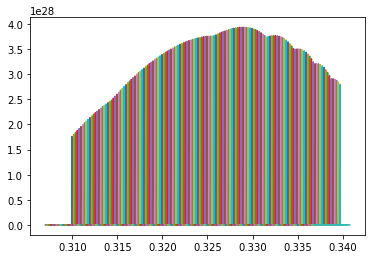

In [27]:
for step in np.arange(1550,1700):
    J_x = np.array(J[step])
    t = dt*np.arange(J_x.shape[0])
    prop_length = step*dt*N_output*sc.c
    z = origin[2] + prop_length + prop[2]*np.arange(J_x.shape[0])
    plt.plot(z,J_x)
plt.show()

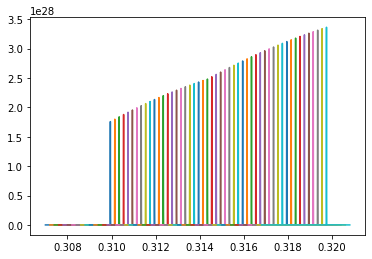

In [28]:
for step in np.arange(1550,1600):
    J_x = np.array(J[step])
    t = dt*np.arange(J_x.shape[0])
    prop_length = step*dt*N_output*sc.c
    z = origin[2] + prop_length + prop[2]*np.arange(J_x.shape[0])
    plt.plot(z,J_x)
plt.show()

In [29]:
λ = 1e-4
z_R = 1.0
w_0 = np.sqrt(z_R*λ/sc.pi)
print(f'w_0 = {w_0:.3g} m')
A_opt = z_R*λ/2.0
print(f'A_opt = {A_opt:.3g} m²')

w_0 = 0.00564 m
A_opt = 5e-05 m²


In [30]:
Q = 1.0e-9
Δz = 0.04*λ
Δt = Δz/sc.c
print(f'Δt = {Δt:.4g} s')

Δt = 1.334e-14 s


In [31]:
E_kin = 30.0e6
mec2 = sc.m_e * sc.c**2 / sc.e
γ = E_kin/mec2 + 1.0
print(f'γ = {γ:.4g}')
λ_U = 0.1
K = np.sqrt((λ/λ_U*2.0*γ**2-1.0)*2.0)
K = np.sqrt(2.0*(λ/λU * 2*γ**2 -1.0))
print(f'K = {K:.4g}')
β_x = K/γ
print(f'β_peak = {β_x:.4g}')
β_x_prime = K/γ * 2.0*sc.pi/λ_U * sc.c
print(f'β\'_peak = {β_x_prime:.4g} /s')

γ = 59.71
K = 3.501
β_peak = 0.05864
β'_peak = 1.105e+09 /s


In [32]:
J_x = β_x_prime * Q / A_opt / Δt
print(f'J_x,peak = {J_x:.4g} A/m²s')
print(f'J_x,peak / eps0 = {J_x/sc.epsilon_0:.4g} V/m s²')

J_x,peak = 1.656e+18 A/m²s
J_x,peak / eps0 = 1.87e+29 V/m s²


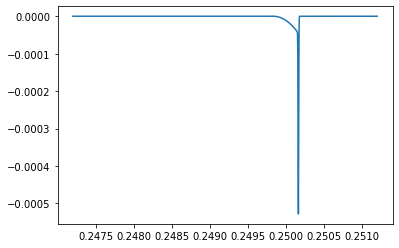

In [46]:
step = 1251
E_x = np.array(a[step])
t = dt*np.arange(E_x.shape[0])
prop_length = step*dt*N_output*sc.c
z = origin[2] + prop_length + prop[2]*np.arange(E_x.shape[0])

plt.plot(z,E_x)
# plt.ylim(-2e3,2e3)
plt.show()

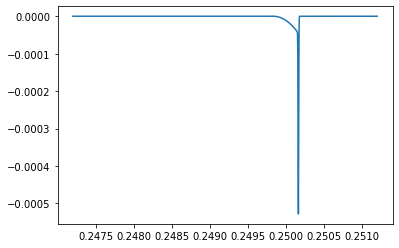

In [48]:
step = 1251
E_x = np.array(a[step])
t = dt*np.arange(E_x.shape[0])
prop_length = step*dt*N_output*sc.c
z = origin[2] + prop_length + prop[2]*np.arange(E_x.shape[0])

plt.plot(z,E_x)
# plt.ylim(-2e3,2e3)
plt.show()

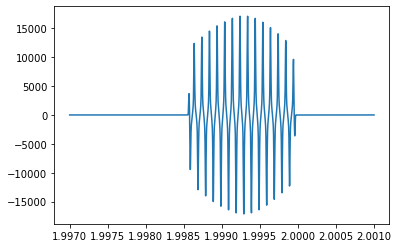

In [50]:
step = 10000
E_x = np.array(a[step])
t = dt*np.arange(E_x.shape[0])
prop_length = step*dt*N_output*sc.c
z = origin[2] + prop_length + prop[2]*np.arange(E_x.shape[0])

plt.plot(z,E_x)
# plt.ylim(-2e3,2e3)
plt.show()

peak power flux S = 780172.2711009904 J/m²s


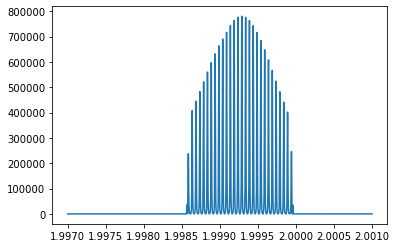

In [51]:
B_y = E_x / sc.c
S = E_x*B_y / sc.mu_0
print(f'peak power flux S = {np.max(S)} J/m²s')
# [V/m * V S/m² * A²/N] = [W²/m³N] = [W/m²s]
plt.plot(z,S)
plt.show()

In [52]:
λ = 1e-4
z_R = 1.0
w_0 = np.sqrt(z_R*λ/sc.pi)
A_opt = sc.pi/2*w_0**2
print(f'optical cross section A_opt = {1e6*A_opt:.3f} mm²')
E_pulse = S.sum()*A_opt*dt
print(f'slice time dt = {dt:.4g} s')
print(f'optical pulse energy E = {E_pulse:.4g} J')

optical cross section A_opt = 50.000 mm²
slice time dt = 6.671e-15 s
optical pulse energy E = 2.686e-11 J


### show snapshot of fields

In [3]:
filename = "fel1d-radiation_snap_2000.h5"

# Open the file for reading
print("reading ",filename)
hdf = h5py.File(filename, "r")
print()

# Get the group
pos = hdf['ObservationPosition']
Nx = pos.attrs.get('Nx')
Ny = pos.attrs.get('Ny')
print("Nx=%d Ny=%d" % (Nx,Ny))

field = hdf['ElMagField']
print(field)
pos = np.array(pos)
a = np.array(field)
hdf.close()
print(f'have read {a.shape} array.')


reading  fel1d-radiation_snap_2000.h5

Nx=1000 Ny=51
<HDF5 dataset "ElMagField": shape (1000, 51, 6), type "<f8">
have read (1000, 51, 6) array.


In [4]:
pos.shape

(1000, 51, 3)

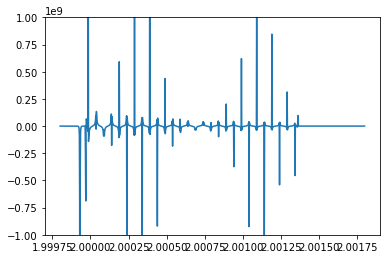

In [8]:
Ex = a[:,25,0]
z = pos[:,25,2]
plt.plot(z,Ex)
plt.ylim(-1e9,1e9)
plt.show()

In [9]:
σ=2.0
gauss = np.exp(-np.square((np.linspace(-15,15,31))/(2*σ*σ)))/(σ*np.sqrt(2.0*np.pi))
gauss

array([0.00593012, 0.00932939, 0.01422562, 0.0210241 , 0.03011564,
       0.04181142, 0.05626342, 0.07338133, 0.09276269, 0.11365523,
       0.13496892, 0.15534828, 0.17330353, 0.18738579, 0.19637863,
       0.19947114, 0.19637863, 0.18738579, 0.17330353, 0.15534828,
       0.13496892, 0.11365523, 0.09276269, 0.07338133, 0.05626342,
       0.04181142, 0.03011564, 0.0210241 , 0.01422562, 0.00932939,
       0.00593012])

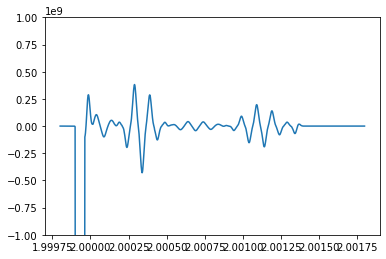

In [10]:
filtered = np.convolve(Ex,gauss,mode='same')
plt.plot(z,filtered)
plt.ylim(-1e9,1e9)
plt.show()

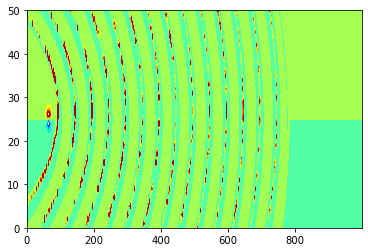

In [11]:
Ex = a[:,:,0].transpose()
elevels = np.linspace(-1e9, 1e9, num=11)
plt.contourf(Ex,elevels,cmap='jet')

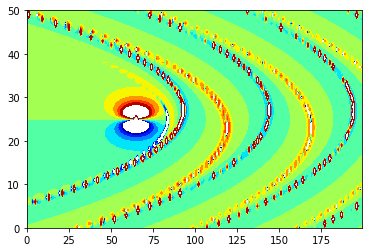

In [13]:
Ex = a[:200,:,0].transpose()
elevels = np.linspace(-2e8, 2e8, num=11)
plt.contourf(Ex,elevels,cmap='jet')